In [22]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv(r"D:\Kuliah\Semester 4\NLP\NLP_COMP6576\dataset.csv")
data.head(10)

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
5,エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...,Japanese
6,tsutinalar i̇ngilizce tsuutina kanadada albert...,Turkish
7,müller mox figura centralis circulorum doctoru...,Latin
8,برقی بار electric charge تمام زیرجوہری ذرات کی...,Urdu
9,シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に...,Japanese


In [24]:
data.shape

(22000, 2)

In [25]:
data=data.iloc[:6000,:]

In [26]:
data["language"].value_counts()

Russian       288
Persian       285
Japanese      284
Arabic        278
Swedish       278
Hindi         278
Turkish       278
French        276
Dutch         275
English       275
Indonesian    274
Thai          274
Portugese     273
Korean        270
Spanish       270
Tamil         270
Pushto        269
Estonian      267
Urdu          263
Latin         261
Chinese       259
Romanian      255
Name: language, dtype: int64

In [27]:
X = data["Text"]
y = data["language"]

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [29]:
data_list = []
for text in X:
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        text = text.lower()
        data_list.append(text)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape

(6000, 102337)

In [31]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [32]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [33]:
y_pred = model.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
score = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",score)

Accuracy is : 0.944


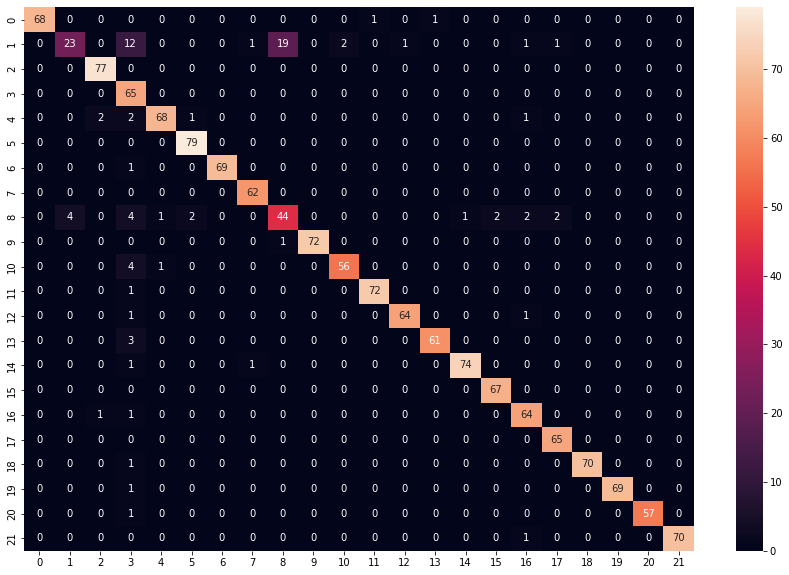

In [35]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [36]:
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0])

In [37]:
predict("apa kabar?")

The langauge is in Indonesian


In [38]:
import tkinter as tk

In [44]:
tk.Button()

<tkinter.Button object .!button>

In [45]:
app=tk.Tk()

In [46]:
# app.title("Language Detector")
# Button=tk.Button(app,text="Detect Language",width=25,command="Hello")
# Button.pack()
# app.mainloop()

In [50]:
# Import Module
from tkinter import *

# Create Object
root = Tk()
  
# Set geometry
root.geometry("400x500")
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     return lang

def language_detection():
    text = T.get("1.0", 'end-1c')
  
    # Get Language code
    language_code = predict(text)
    l_d.config(text="Language Detected:- "+language_code)
  
  
# Text Box
T = Text(root)
T.pack()

# label
l_d = Label(root, text="Language Detected:- ")
l_d.pack(pady=10)
  
# Button
Button(root, text='Detect Language', command=language_detection).pack(pady=10)
  
# Execute Mainloop
root.mainloop()